# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [89]:
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(784, ))
#inputs = keras.Input(shape=(784, 0))
l1 = layers.Dense(70, activation = "relu")(inputs)
l2 = layers.Dense(30, activation = "tanh")(l1)
l3 = layers.Dense(30, activation="tanh")(l2)
l4 = layers.Dense(70, activation="relu")(l3)
#outputs = layers.Dense((28,28), activation="sigmoid")(l4) ## didnt work in 2D

outputs = layers.Dense(784, activation="sigmoid")(l4)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_60 (Dense)             (None, 70)                54950     
_________________________________________________________________
dense_61 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_62 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_63 (Dense)             (None, 70)                2170      
_________________________________________________________________
dense_64 (Dense)             (None, 784)               55664     
Total params: 115,844
Trainable params: 115,844
Non-trainable params: 0
____________________________________________________

Best loss results with Tanh in bottleneck layers, see below

In [90]:
# pass optimizer by name: default parameters will be used
# loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#loss_fn = keras.losses.SparseCategoricalCrossentropy()

# model.compile(loss='sparse_categorical_crossenropy', optimizer='adam') ### ValueError: Shape mismatch: The shape of labels (received (25088,)) should equal the shape of logits except for the last dimension (received (32, 784)).
# model.compile(loss=loss_fn, optimizer='adam')  ## just tested the example code

#model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy())

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(optimizer=opt, loss="binary_crossentropy") #using mean squared error is also an option

In [91]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [93]:
history = model.fit(x_train, x_train, epochs=20, batch_size=32, verbose=2 )

Epoch 1/20
1875/1875 - 4s - loss: 0.0101 - mse: 0.0101 - mae: 0.0345 - mape: 6704946.0000
Epoch 2/20
1875/1875 - 4s - loss: 0.0100 - mse: 0.0100 - mae: 0.0341 - mape: 6572113.0000
Epoch 3/20
1875/1875 - 4s - loss: 0.0098 - mse: 0.0098 - mae: 0.0338 - mape: 6471290.5000
Epoch 4/20
1875/1875 - 4s - loss: 0.0097 - mse: 0.0097 - mae: 0.0335 - mape: 6364503.0000
Epoch 5/20
1875/1875 - 4s - loss: 0.0096 - mse: 0.0096 - mae: 0.0333 - mape: 6269128.0000
Epoch 6/20
1875/1875 - 4s - loss: 0.0095 - mse: 0.0095 - mae: 0.0330 - mape: 6169765.5000
Epoch 7/20
1875/1875 - 4s - loss: 0.0093 - mse: 0.0093 - mae: 0.0327 - mape: 6062119.5000
Epoch 8/20
1875/1875 - 4s - loss: 0.0092 - mse: 0.0092 - mae: 0.0324 - mape: 5969960.0000
Epoch 9/20
1875/1875 - 4s - loss: 0.0091 - mse: 0.0091 - mae: 0.0322 - mape: 5885543.5000
Epoch 10/20
1875/1875 - 4s - loss: 0.0090 - mse: 0.0090 - mae: 0.0319 - mape: 5802248.5000
Epoch 11/20
1875/1875 - 4s - loss: 0.0089 - mse: 0.0089 - mae: 0.0317 - mape: 5726966.5000
Epoch 12

In [94]:
prediction = model.predict(x_train)

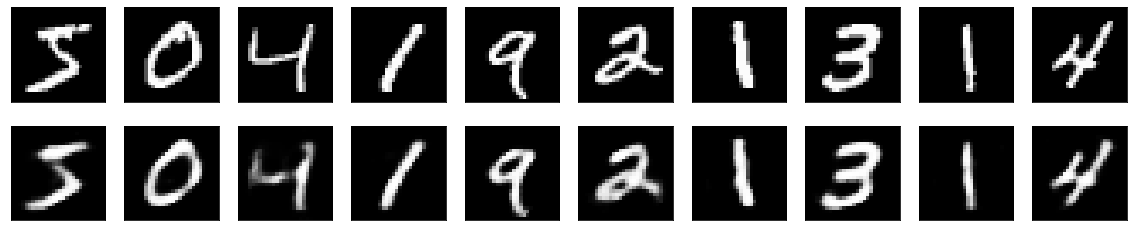

In [95]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [101]:
scores = model.evaluate(x_train, x_train, verbose=1)
print("Accuracy: %.2f%%", (scores[1]*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0306 - mape: 5411591.5000
Accuracy: %.2f%% 0.848457682877779


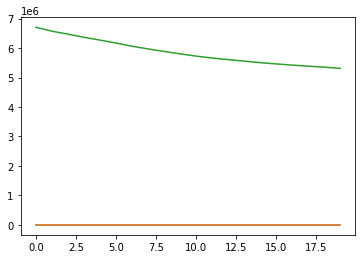

In [102]:
from matplotlib import pyplot
from numpy import array
from keras.models import Sequential
# plot metrics ## https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
pyplot.plot(history.history['mse']) ## Mean Squared Error
pyplot.plot(history.history['mae']) ## Mean absolute error
pyplot.plot(history.history['mape']) ## mean absolute percentage error

In [82]:
#error = np.sum(np.abs(x_test-prediction),axis=1) ## operands could not be broadcast together with shapes (10000,784) (60000,784)